# Implementation of k-Means Clustering


# Neeraj Joshi
# Roll No - 120
# Aiml Batch 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [6]:
labels = df["Wine"] 
# labels

# Standardize the Variables

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df.drop('Wine',axis=1))
scaled_features = scaler.transform(df.drop('Wine',axis=1))
df_feat = pd.DataFrame(scaled_features , columns=df.columns[1:])

df_feat.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
df_feat.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Text(0, 0.5, 'FREQUENCY')

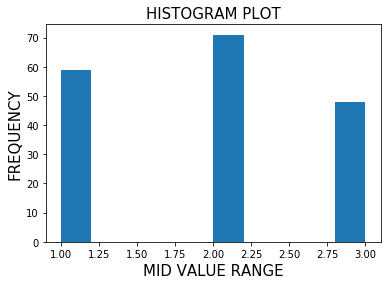

In [9]:
plt.hist(df['Wine'])
plt.title('HISTOGRAM PLOT' , fontsize = 15)
plt.xlabel('MID VALUE RANGE' , fontsize = 15)
plt.ylabel('FREQUENCY' , fontsize = 15)

Text(0, 0.5, 'Label')

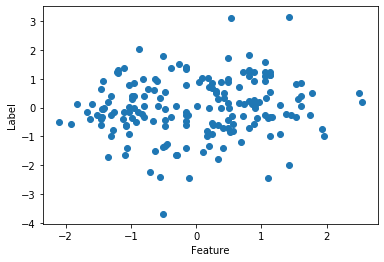

In [10]:
plt.scatter(df_feat.Phenols , df_feat.Ash)
plt.xlabel('Feature')
plt.ylabel('Label')

# Creating 3  random centroids from the data

In [11]:
import random
init_centroids = random.sample(range(0, len(df_feat)), 3)
init_centroids

[159, 151, 135]

In [12]:
centroids = []
for i in init_centroids:
    centroids.append(df_feat.loc[i])
    
centroids = np.array(centroids)
print("3 centroids are : ")
centroids

3 centroids are : 


array([[ 0.59216382, -0.59815632,  0.99967413,  0.90237327, -0.75420173,
         0.48853108, -0.93295582,  1.27431034,  1.22488398,  2.89471945,
        -1.69987192, -1.17470806, -0.40409079],
       [-0.26016901,  0.29950682,  0.41481959,  0.75223078,  0.86070511,
        -1.30608025, -0.67192447, -0.98187536, -0.57976267,  2.48377796,
        -2.09473241, -1.61256533, -0.84991991],
       [-0.49486935,  0.11099756, -0.60867587, -0.2987667 , -0.40313502,
        -1.08175383, -1.37470118,  2.16066901, -1.14042959,  0.88326902,
        -0.99789773, -1.45719662, -0.16525376]])

## Function fors calculating the distance and assigning the centroids

In [13]:
def calc_distance(X1 , X2) :
    return(sum((X1 - X2)**2))**0.5

In [14]:
def findClosestCentroids(ic , X) :
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [15]:
get_centroids = findClosestCentroids(centroids , scaled_features)
print(get_centroids)

[0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0]


In [16]:
len(get_centroids)

178

The length is same as the length of our dataset which means in iteration 1 we sucessfully assigned the clusters (0 , 1 , 2) to all of the datapoints . 

# Function for calculating the average of centroids 

In [17]:
def update_centroids(clusters , X) :
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X) , pd.DataFrame(clusters, columns=['cluster'])] , axis=1)
    
    for c in set(new_df['cluster']) :
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Repeating the process 10 times for better results

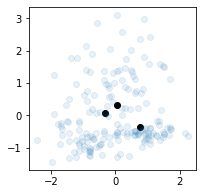

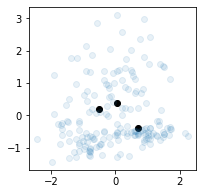

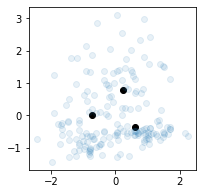

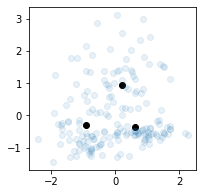

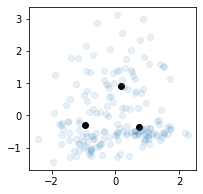

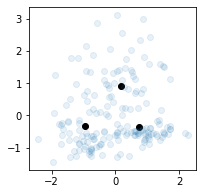

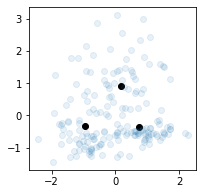

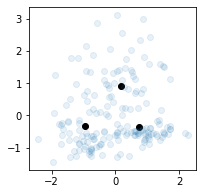

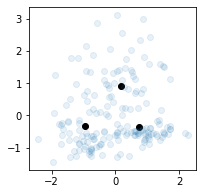

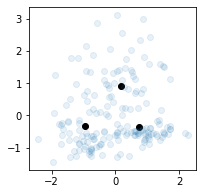

WE HAVE 13 FEATURES BUT WHILE PLOTTING WE CAN ONLY PLOT 2 FEATURES AT A TIME SO OUR GRAPH WILL NOT LOOK THAT ACCURATE       HOWEVER IF WE COULD PRINT ALL 13 FEATURES AT A TIME THEN WE CAN SEE THE CLUSTRING PERFECTELY


In [19]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids , scaled_features)
    centroids = update_centroids(get_centroids , scaled_features)
    
    plt.figure(figsize=(3,3))
    plt.scatter(np.array(centroids)[:, 0] , np.array(centroids)[:, 1] , color='black')
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], alpha=0.1)
    plt.show()

print("WE HAVE 13 FEATURES BUT WHILE PLOTTING WE CAN ONLY PLOT 2 FEATURES AT A TIME SO OUR GRAPH WILL NOT LOOK THAT ACCURATE \
      HOWEVER IF WE COULD PRINT ALL 13 FEATURES AT A TIME THEN WE CAN SEE THE CLUSTRING PERFECTELY")